# Perceptrons

In [30]:
# Import libraries
%matplotlib inline
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

In [31]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:100,:2]  # we only take the first two features.
Y = iris.target[:100]

### Line separating the features. Change this to get lines separating the features

In [34]:
# Line parameters
m = 1.1 # Slope
c = -2.75  # Intercept

# Creating line
x1 = np.linspace(np.min(X[:,0]), np.max(X[:,0]), 100)
y1 = m*x1 + c

### Let's plot this!

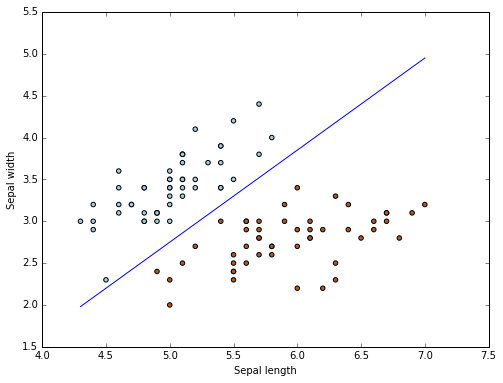

In [35]:
plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(x1,y1)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [36]:
# Create perceptron
threshold = 1

# Get weights using the line equations from above
w2 = threshold / c
w1 = -1 * w2 * m

# Perceptron calculation
plant_class = ((X[:,0] * w1 + X[:,1] * w2) > threshold) + 0

# Compare
correctly_classified = np.all(plant_class == Y)


In [37]:
correctly_classified

True

### A real perceptron

In [38]:
from random import choice
from numpy import array, dot, random

def unit_step(x,theta):
    ''' This is our activation function. '''
    fx = 0
    if x < theta:
        fx= 0
    else:
        fx= 1
    return fx

training_data = [
    array([0,0,1]),
    array([0,1,1]),
    array([1,0,1]),
    array([1,1,1]),
]

target = [0,1,1,1]

w = random.rand(3) # Initializing weights randomly.
errors = []
eta = 0.2 # Learning rate
n = 100 # Number of iterations
theta = 0.25 # Threshold

for i in range(n):
    x, expected = choice(list(zip(training_data,target)))
    result = dot(w, x)
    error = expected - unit_step(result,theta)
    errors.append(error)
    w += eta * error * x

for x, _ in zip(training_data,target):
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result,theta)))
    

[0 0]: 0.227399965745 -> 0
[0 1]: 0.704595758278 -> 1
[1 0]: 0.325934901387 -> 1
[1 1]: 0.80313069392 -> 1


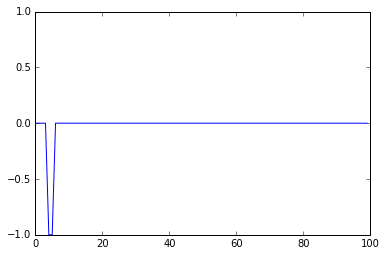

In [25]:
from pylab import plot, ylim
ylim([-1,1])
plot(errors)

(0, 1)

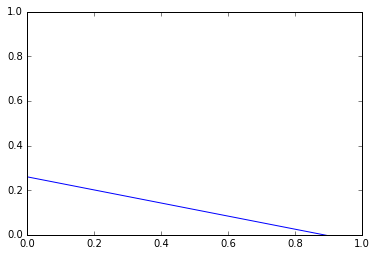

In [26]:
k = np.linspace(0,1,100)
plt.plot(k,-(w[0]/w[1])*k + theta/w[1] - w[2]/w[1])
plt.xlim((0,1))
plt.ylim((0,1))

### Let's use it for Iris!

In [39]:
import itertools
training_data = X

training_data = [np.append(x,[1]) for x in training_data]
target = Y
w = random.rand(3) # Initializing weights randomly.
errors = []
eta = 0.2 # Learning rate
n = 100000 # Number of iterations
theta = 0.25 # Threshold

data = itertools.cycle(zip(training_data,target))

for i in range(n):
    x, expected = next(data)    
    result = dot(w, x)
    error = expected - unit_step(result,theta)
    errors.append(error)
    w += eta * error * x

for x, _ in zip(training_data,target):
    result = dot(x, w)
    print("{}: {} -> {}".format(x[:2], result, unit_step(result,theta)))

[ 5.1  3.5]: -14.3926566688 -> 0
[ 4.9  3. ]: -7.50863963457 -> 0
[ 4.7  3.2]: -14.6948907479 -> 0
[ 4.6  3.1]: -14.267939691 -> 0
[ 5.   3.6]: -17.9857822255 -> 0
[ 5.4  3.9]: -17.6835481464 -> 0
[ 4.6  3.4]: -20.2980546114 -> 0
[ 5.   3.4]: -13.9657056119 -> 0
[ 4.4  2.9]: -13.4140375771 -> 0
[ 4.9  3.1]: -9.51867794137 -> 0
[ 5.4  3.7]: -13.6634715328 -> 0
[ 4.8  3.4]: -17.1318801116 -> 0
[ 4.8  3. ]: -9.09172688445 -> 0
[ 4.3  3. ]: -17.0071631338 -> 0
[ 5.8  4. ]: -13.3612374537 -> 0
[ 5.7  4.4]: -22.9844779307 -> 0
[ 5.4  3.9]: -17.6835481464 -> 0
[ 5.1  3.5]: -14.3926566688 -> 0
[ 5.7  3.8]: -10.92424809 -> 0
[ 5.1  3.8]: -20.4227715892 -> 0
[ 5.4  3.4]: -7.63335661239 -> 0
[ 5.1  3.7]: -18.4127332824 -> 0
[ 4.6  3.6]: -24.318131225 -> 0
[ 5.1  3.3]: -10.3725800552 -> 0
[ 4.8  3.4]: -17.1318801116 -> 0
[ 5.  3.]: -5.9255523847 -> 0
[ 5.   3.4]: -13.9657056119 -> 0
[ 5.2  3.5]: -12.8095694189 -> 0
[ 5.2  3.4]: -10.7995311121 -> 0
[ 4.7  3.2]: -14.6948907479 -> 0
[ 4.8  3.1]: -11.

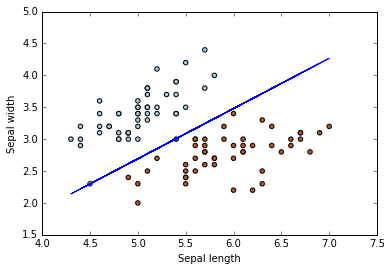

In [40]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.plot(X[:,0],-(w[0]/w[1])*X[:,0] + theta/w[1] - w[2]/w[1])
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')


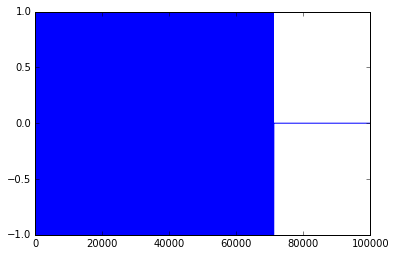

In [41]:
from pylab import plot, ylim
ylim([-1,1])
plot(errors)

In [42]:
# Perceptron calculation
plant_class = ((X[:,0] * w[0] + X[:,1] * w[1] + w[2]) > theta) + 0

# Compare
correctly_classified = np.all(plant_class == Y)
correctly_classified
    

True

In [43]:
-(w[0]/w[1])

0.7875905869660299

In [44]:
 theta/w[1] - w[2]/w[1]

-1.2451884916755898